# Get the data

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def getTrainAndValData(fileName, imgDirPath, imgLabels, imgMat):
    global trainData
    f = open(fileName, "r")
    
    f.readline()
    for line in f:
        imgName, imgLabel = line.split(',')
        imgPath = imgDirPath + imgName
    
        imgLabels.append(float(imgLabel))
        imgMat.append(plt.imread(imgPath))
        
#         if fileName == trainData:
#             expandedImg = np.expand_dims(imgMat[-1], 0)
#             genTrainImg = imgGen.flow(expandedImg)
#             for i in range(9):
#                 imgMat.append(next(genTrainImg)[0])
#                 imgLabels.append(float(imgLabel))

def getTestData(fileName, imgDirPath, imgNamesArr, imgMat):
    f = open(fileName, "r")
    
    f.readline()
    for line in f:
        imgName = line.strip()
        imgPath = imgDirPath + imgName
        
        imgNamesArr.append(imgName)
        imgMat.append(plt.imread(imgPath))
        
defPath = "Desktop/Facultate/Anul 2/Sem_2/AI/Contest/"
imgDirPath = defPath + "train+validation/"
trainData = defPath + "train.txt"
validationData = defPath + "validation.txt"
testData = defPath + "test.txt"
testImgPath = defPath + "test/"

imgGen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
                            zoom_range=0.1, horizontal_flip=True)

trainImgLabels = []
trainImgMat = []
getTrainAndValData(trainData, imgDirPath, trainImgLabels, trainImgMat)

validationImgLabels = []
validationImgMat = []
getTrainAndValData(validationData, imgDirPath, validationImgLabels, validationImgMat)

testImgNames = []
testImgMat = []
getTestData(testData, testImgPath, testImgNames, testImgMat)

trainImgLabels = np.array(trainImgLabels)
trainImgMat = np.array(trainImgMat)

validationImgLabels = np.array(validationImgLabels)
validationImgMat = np.array(validationImgMat)

testImgNames = np.array(testImgNames)
testImgMat = np.array(testImgMat)

print('Done')

Done


# Print data sizes, lengths and shapes

In [23]:
trainImgLabels.size, len(trainImgMat), validationImgLabels.size, len(validationImgMat)

(8000, 8000, 1173, 1173)

In [24]:
trainImgMat.shape, validationImgMat.shape

((8000, 16, 16, 3), (1173, 16, 16, 3))

# Plot some images 

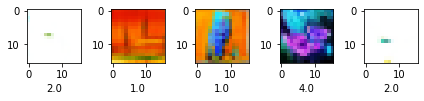

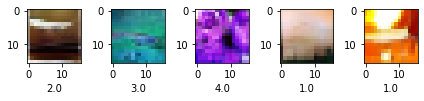

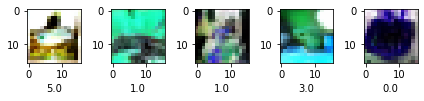

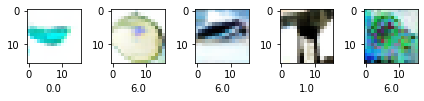

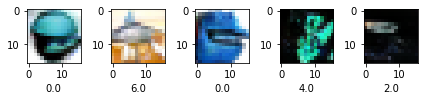

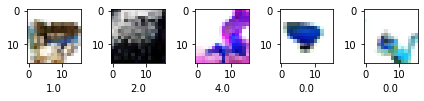

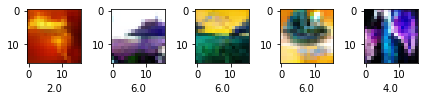

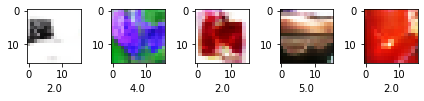

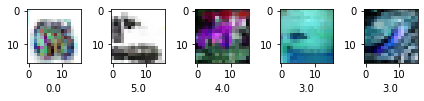

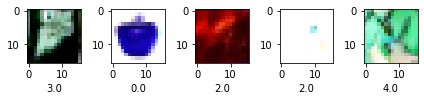

In [25]:
imgNr = 0
for i in range(10):
    fig, axis = plt.subplots(1, 5)

    for j in range(5):
        axis[j].imshow(trainImgMat[imgNr])
        axis[j].set_xlabel(trainImgLabels[imgNr])
        imgNr = imgNr + 1

    plt.tight_layout()

# Verify that  tensorflow is running on GPU

In [26]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8391883163869873285
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2249929524
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5662848923341692987
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


# Classify validation images

In [30]:
trainImgMat = trainImgMat.reshape(len(trainImgMat), 16 * 16 * 3)
validationImgMat = validationImgMat.reshape(len(validationImgMat), 16 * 16 * 3)
predictions = []
for i in range(len(validationImgMat)):
    distances = np.sum(np.power((trainImgMat - validationImgMat[i]), 2), axis=1)
#     print(distances)
    nearestInd = np.argsort(distances)
    nearestInd = nearestInd[:5]
    kNearest = [int(x) for x in trainImgLabels[nearestInd]]
    p = np.argmax(np.bincount(kNearest))
    predictions.append(p)
    if i % 200 == 0:
        print(f'Index {i}')
    
print('Done')

acc = np.sum(validationImgLabels == predictions) / len(validationImgLabels)
print(f'Accuracy: {acc}')

Index 0
Index 200
Index 400
Index 600
Index 800
Index 1000
Done
Accuracy: 0.4057971014492754


# Write the results in file 

In [51]:
samplesFile = defPath + "sample_submission.txt" 
f = open(samplesFile, "w")
f.write("id,label\n")

for i in range(len(testImgNames)):
    f.write(f"{testImgNames[i]},{testImgLabels[i]}\n")

f.close()

print("Done")

Done
